This notebook generates pixel art as an Img2Img task.

In [3]:
from diffusers import AutoPipelineForImage2Image
import torch
from IPython import display

pipe = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")
pipe.load_lora_weights("nerijs/pixel-art-xl", adapter_name="pixel")
pipe.set_adapters(["pixel"], adapter_weights=[1.0])
pipe.to(device="cuda", dtype=torch.float16)
print()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

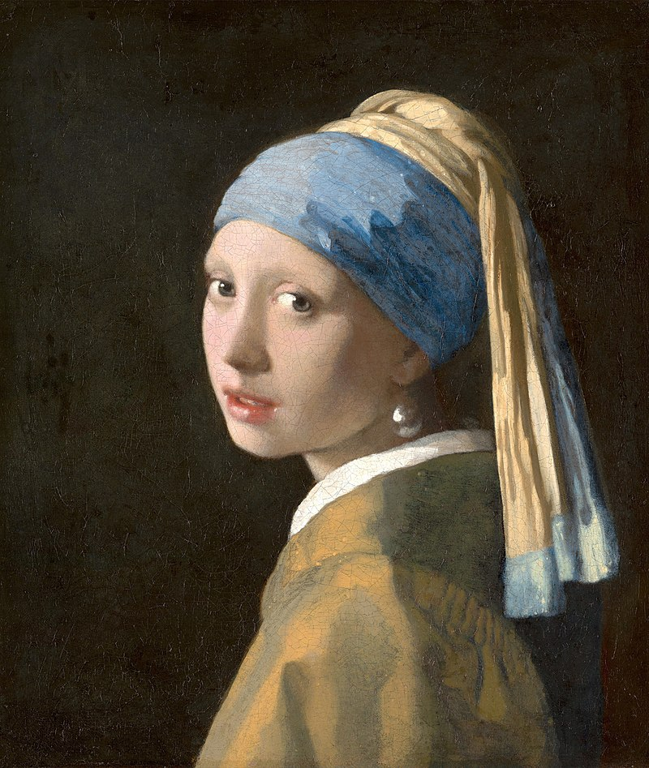

In [2]:
import requests
from PIL import Image
from io import BytesIO
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/1665_Girl_with_a_Pearl_Earring.jpg/800px-1665_Girl_with_a_Pearl_Earring.jpg"

response = requests.get(url)
input_image = Image.open(BytesIO(response.content)).convert("RGB")
input_image.thumbnail((768, 768))
input_image

  0%|          | 0/150 [00:00<?, ?it/s]

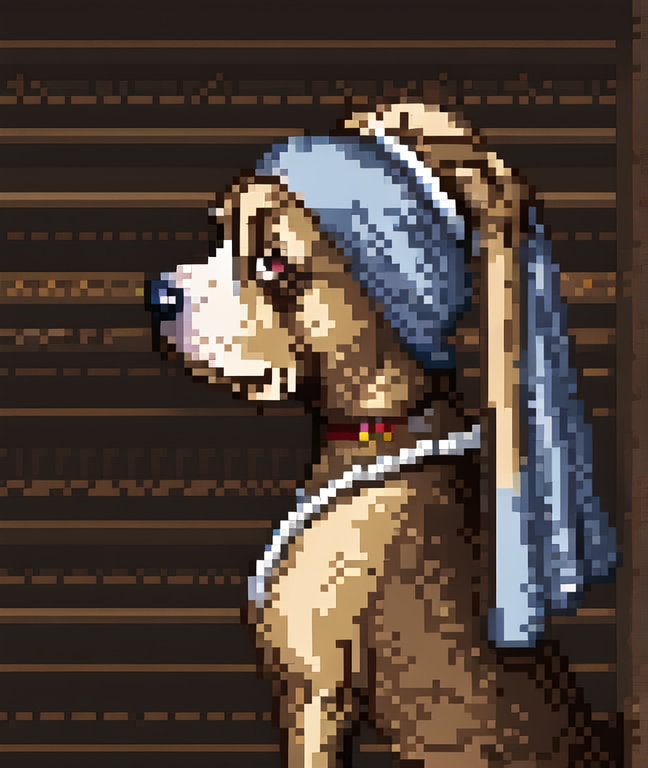

In [4]:
prompt = "a portrait of a dog wearing a pearl earring, pixel art"
image = pipe(prompt, image=input_image, num_inference_steps=200, strength=0.75, guidance_scale=10.5).images[0]
image